In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm




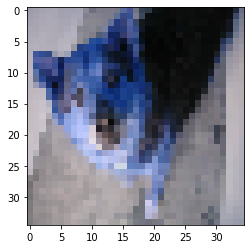

[[[157 153 165]
  [157 153 165]
  [157 155 167]
  ...
  [104 110 129]
  [113 113 131]
  [114 112 131]]

 [[157 153 165]
  [157 153 165]
  [157 155 167]
  ...
  [105 111 130]
  [114 114 132]
  [115 113 132]]

 [[155 153 165]
  [155 153 165]
  [156 154 166]
  ...
  [109 113 131]
  [113 115 133]
  [115 115 133]]

 ...

 [[111 106 108]
  [113 108 110]
  [116 111 113]
  ...
  [147 153 164]
  [148 154 165]
  [148 154 165]]

 [[112 107 109]
  [114 109 111]
  [116 111 113]
  ...
  [147 153 164]
  [149 155 166]
  [149 155 166]]

 [[112 110 110]
  [115 113 113]
  [115 112 114]
  ...
  [148 154 167]
  [149 155 166]
  [146 155 165]]]
(337, 450, 3)
Then
[[157 157 159 ... 115 118 118]
 [157 157 159 ... 116 119 119]
 [157 157 158 ... 118 120 120]
 ...
 [107 109 112 ... 156 157 157]
 [108 110 112 ... 156 158 158]
 [110 113 113 ... 157 158 157]]
(337, 450)


In [16]:
dirdog="/home/shreyas/PetImages/Dog"
i=os.listdir(dirdog)[0]#first dog
ia=cv2.imread(os.path.join(dirdog,i))  #image array
IMG_SIZE = 35

new_array = cv2.resize(ia, (IMG_SIZE, IMG_SIZE))#resolution enough
dircat="/home/shreyas/PetImages/Cat"
plt.imshow(new_array)
plt.show()
#comparing grayscale vs normal
iag=cv2.imread(os.path.join(dirdog,i),cv2.IMREAD_GRAYSCALE)
print(ia)
print(ia.shape)
print("Then")
print(iag)
print(iag.shape)

In [3]:
trainingds=[]
for i in tqdm(os.listdir(dirdog)):#faster iteration
    try:
        img_array=cv2.imread(os.path.join(dirdog,i))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        trainingds.append([new_array,0])
    except:
        pass
#for cats,similarly    
for i in tqdm(os.listdir(dircat)):#faster iteration
    try:
        img_array=cv2.imread(os.path.join(dircat,i))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        trainingds.append([new_array,1])
    except:
        pass
    #ignore this block since unequal things come

100%|████████████████████████████████████| 12501/12501 [00:13<00:00, 934.90it/s]


In [4]:
#not running this ,ignore this cell
trainingds2=[]
dict={dirdog:0,dircat:1}
for i in [dirdog,dircat]:
    
    
        for j in tqdm(os.listdir(i)):#faster iteration
            try:
                img_array=cv2.imread(os.path.join(i,j))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                trainingds2.append([new_array,dict[i]])
    
    
            except Exception as e:
            
                pass
print(trainingds==trainingds2)#REJECT1

 12%|████▌                                | 1544/12501 [00:01<00:12, 844.86it/s]Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
100%|███████████████████████████████████| 12501/12501 [00:11<00:00, 1110.66it/s]

False


In [22]:
print(len(trainingds))
print(np.shape(np.array(trainingds,dtype=list)))

24946
(24946, 2)


In [5]:
import random
random.shuffle(trainingds)

In [24]:
print(trainingds[0])

[array([[[ 91, 131, 160],
        [ 97, 145, 164],
        [ 63, 130, 133],
        ...,
        [ 62, 115, 136],
        [ 46, 100, 104],
        [ 76, 127, 175]],

       [[ 67, 131, 125],
        [ 96, 126, 153],
        [ 93, 153, 176],
        ...,
        [ 62, 116, 130],
        [ 42,  90, 106],
        [ 73, 119, 132]],

       [[ 77, 137, 155],
        [ 87, 135, 169],
        [ 61, 105, 132],
        ...,
        [101, 139, 135],
        [ 34,  51,  59],
        [116, 162, 160]],

       ...,

       [[ 21,  53,  86],
        [ 94, 127, 152],
        [ 44,  82, 112],
        ...,
        [ 94, 147, 140],
        [ 45,  77,  88],
        [ 52,  97, 106]],

       [[ 75, 124, 158],
        [ 37,  77, 117],
        [ 33,  56,  88],
        ...,
        [ 95, 140, 143],
        [ 42,  60,  75],
        [ 25,  38,  57]],

       [[ 99, 153, 177],
        [ 43, 108, 111],
        [ 59,  89, 117],
        ...,
        [ 59,  87, 102],
        [ 24,  42,  63],
        [ 13,  23,  38]

In [55]:
#testing reshape
x=trainingds[2][0]
x=np.array(x)
x=x.reshape(-1,35,35,1)#image size,dont feel like changing :-)

print(x)
#/tmp/ipykernel_3394/2798063924.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
    
    

[[[[  8]
   [  9]
   [  7]
   ...
   [ 34]
   [ 31]
   [ 36]]

  [[ 34]
   [ 21]
   [ 26]
   ...
   [ 22]
   [ 21]
   [ 12]]

  [[ 17]
   [ 16]
   [ 11]
   ...
   [ 12]
   [ 14]
   [ 15]]

  ...

  [[113]
   [111]
   [130]
   ...
   [  6]
   [ 10]
   [  9]]

  [[ 28]
   [ 29]
   [ 27]
   ...
   [ 87]
   [ 70]
   [ 81]]

  [[ 79]
   [ 81]
   [ 88]
   ...
   [109]
   [107]
   [136]]]


 [[[142]
   [137]
   [127]
   ...
   [ 16]
   [ 21]
   [ 24]]

  [[ 41]
   [ 44]
   [ 42]
   ...
   [ 93]
   [ 84]
   [ 92]]

  [[ 91]
   [ 72]
   [ 77]
   ...
   [105]
   [102]
   [115]]

  ...

  [[124]
   [ 62]
   [ 78]
   ...
   [138]
   [143]
   [130]]

  [[136]
   [131]
   [105]
   ...
   [ 17]
   [ 29]
   [ 28]]

  [[ 41]
   [ 43]
   [ 37]
   ...
   [111]
   [110]
   [127]]]


 [[[130]
   [133]
   [151]
   ...
   [148]
   [144]
   [ 97]]

  [[ 99]
   [ 93]
   [ 91]
   ...
   [ 29]
   [ 33]
   [ 33]]

  [[ 54]
   [ 55]
   [ 50]
   ...
   [132]
   [103]
   [108]]

  ...

  [[ 61]
   [ 45]
   [ 26]
   

In [17]:
X = []
y = []

for features,label in trainingds:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
print(len(X))
print(len(y))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y=np.array(y)

24946
24946


In [20]:
#saving
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [19]:
print(X.shape)

(24946, 35, 35, 3)


In [5]:
print(scores)

[[[[ 91]
   [131]
   [160]
   ...
   [131]
   [124]
   [123]]

  [[113]
   [145]
   [145]
   ...
   [ 61]
   [ 75]
   [ 59]]

  [[ 94]
   [109]
   [ 44]
   ...
   [ 76]
   [127]
   [175]]

  ...

  [[ 61]
   [ 92]
   [ 87]
   ...
   [ 51]
   [ 79]
   [ 93]]

  [[ 28]
   [ 58]
   [ 79]
   ...
   [150]
   [ 83]
   [122]]

  [[160]
   [100]
   [138]
   ...
   [ 84]
   [117]
   [ 41]]]


 [[[ 61]
   [ 91]
   [ 85]
   ...
   [ 62]
   [ 87]
   [ 97]]

  [[ 83]
   [129]
   [153]
   ...
   [144]
   [ 43]
   [ 72]]

  [[ 99]
   [ 91]
   [128]
   ...
   [104]
   [137]
   [ 53]]

  ...

  [[124]
   [ 53]
   [ 85]
   ...
   [ 90]
   [123]
   [ 44]]

  [[ 75]
   [106]
   [ 48]
   ...
   [ 49]
   [ 73]
   [ 81]]

  [[ 60]
   [ 97]
   [116]
   ...
   [134]
   [ 60]
   [ 94]]]


 [[[123]
   [ 58]
   [ 89]
   ...
   [ 75]
   [106]
   [ 46]]

  [[ 76]
   [105]
   [ 61]
   ...
   [100]
   [140]
   [169]]

  [[ 57]
   [ 90]
   [101]
   ...
   [122]
   [ 62]
   [ 93]]

  ...

  [[ 99]
   [153]
   [177]
   